## Importing the libraries which

In [146]:
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, randint

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

from sklearn.feature_selection import RFECV
from mlxtend.feature_selection import SequentialFeatureSelector

In [147]:
# Read the data
df=pd.read_csv("cardekho_dataset.csv",index_col=0)

In [148]:
# Check first 5 rows
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [149]:
# Check last 5 rows
df.tail()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
19543,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [150]:
# Check data shape using .shape
df.shape

(15411, 13)

We can see that dataframe has 15411 rows and 13 columns

In [151]:
# Check data types using .dtypes
df.dtypes

car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

In [152]:
# Check for basic information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


In [153]:
df.select_dtypes(include = 'number').columns

Index(['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price'],
      dtype='object')

In [154]:
# Check for number of numerical and categorical columns

print("There are {} numerical_features: \n{}".format(len(df.select_dtypes(include = 'number').columns), df.select_dtypes(include = 'number').columns))
print("\nThere are {} categorical_features: \n{}".format(len(df.select_dtypes(include = 'object').columns), df.select_dtypes(include = 'object').columns))

There are 7 numerical_features: 
Index(['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price'],
      dtype='object')

There are 6 categorical_features: 
Index(['car_name', 'brand', 'model', 'seller_type', 'fuel_type',
       'transmission_type'],
      dtype='object')


## Data Decritption(Feature Information)

**car_name** - Car's Full name, which includes brand and specific model name.

**brand** - Brand Name of the particular car.

**model** - Exact model name of the car of a particular brand.

**vehicle_age** - The count of years since car was bought.

**km_driven** - The count of kilometers driven since car was bought.

**seller_type** - Which Type of seller is selling the used car

**fuel_type** - Fuel used in the used car, which was put up on sale.

**transmission_type** - Transmission used in the used car, which was put on sale.

**mileage** - It is the number of kilometer the car runs per litre.

**engine** - It is the engine capacity in cc(cubic centimeters)

**max_power** - Max power it produces in BHP.

**seats** - Total number of seats in car.

**selling_price** - The sale price which was put up on website.

In [155]:
# Check for missing values

df.isna().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

    We can see that there are no missing values in the data

## Univariate Ananlysis

### Numerical Features

In [156]:
# For numerical columns

df.select_dtypes(include = 'number').describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [157]:
df.select_dtypes(include = 'number').median()

vehicle_age           6.00
km_driven         50000.00
mileage              19.67
engine             1248.00
max_power            88.50
seats                 5.00
selling_price    556000.00
dtype: float64

**Inference**    

    Most of the numerical columns have approximately equal mean and median, except for engine, max_power and selling price

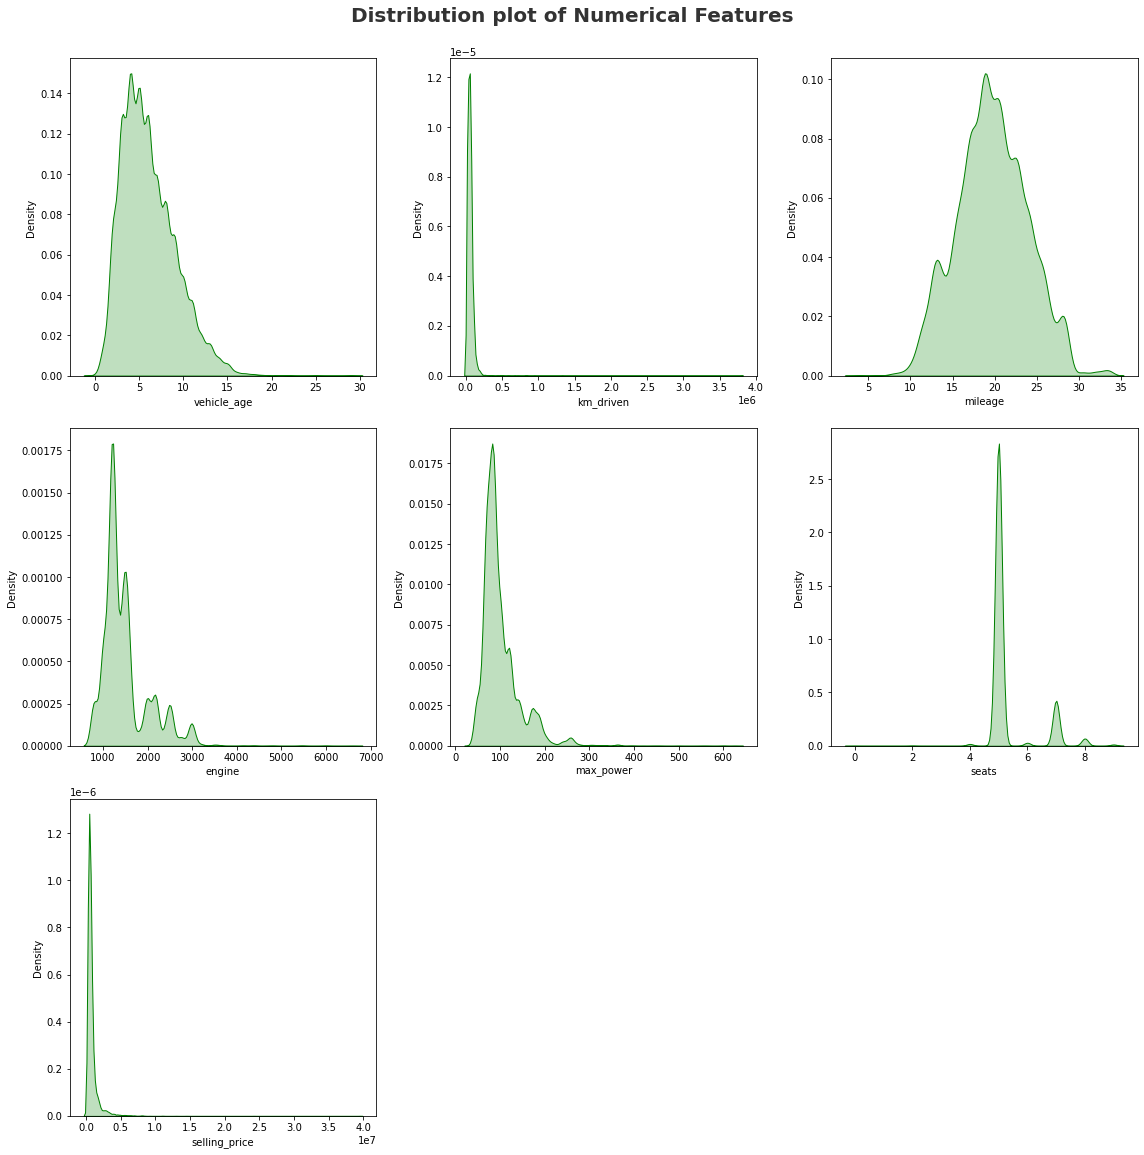

In [158]:
# check the distribution of the numerical features
numerical_features = df.select_dtypes(include = 'number').columns
plt.figure(figsize = (16,16)) # figure size
plt.suptitle('Distribution plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0,len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x = df[numerical_features[i]], shade = True, color = 'g')  
    plt.tight_layout()

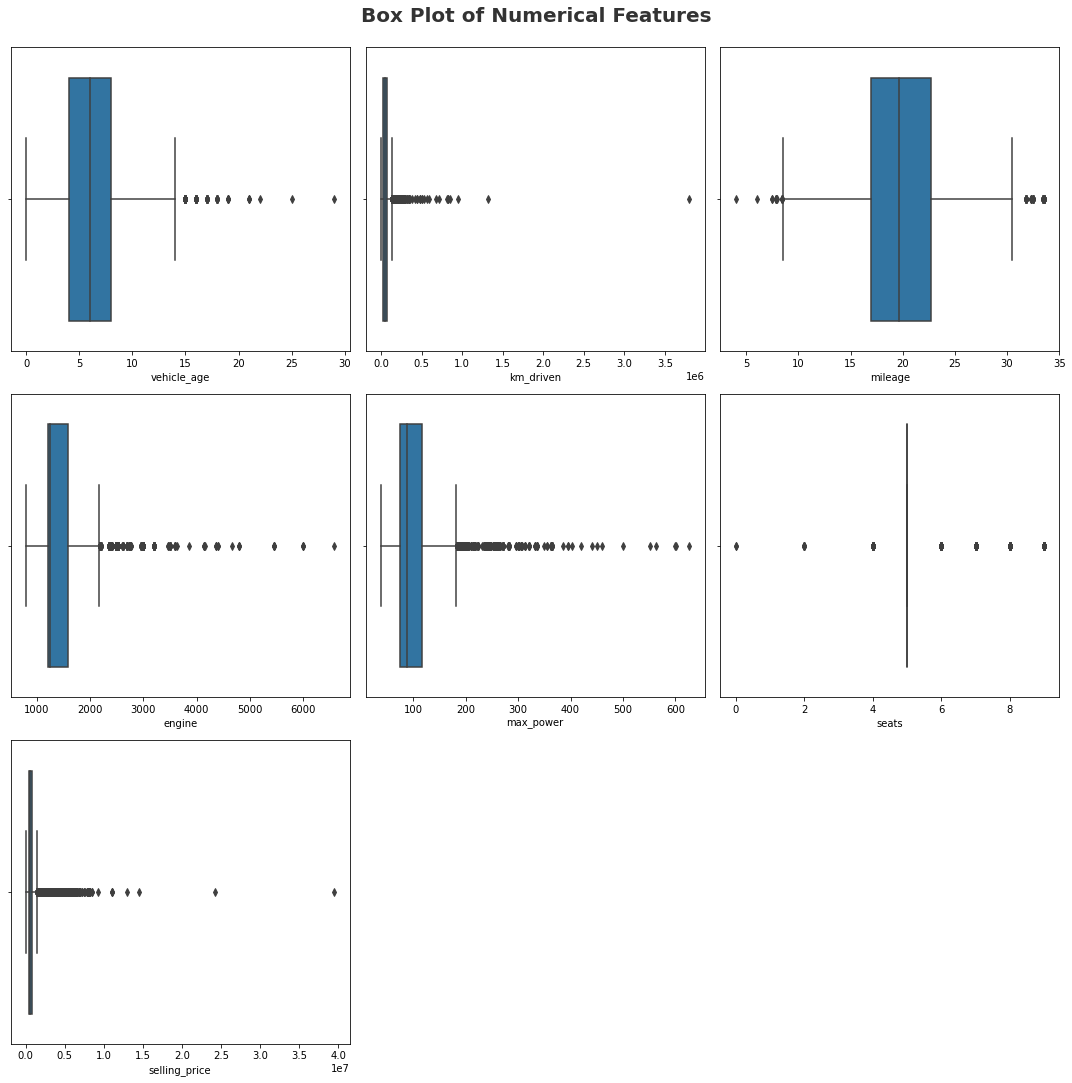

In [159]:
# plot box plot of numerical columns 
plt.figure(figsize=(15, 15)) # figure size
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numerical_features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[numerical_features[i]])
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

**Inference**
        
       km_driven, engine, max_power and selling_price are right skewed.
       out liers in km_driven, engine, max_power and selling price

### Categorical Features

In [160]:
# for categoricaklcolumns

df.select_dtypes(include = 'object').describe()

,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


In [161]:
# find the percentage of each category in the categorical columns
for i in df.select_dtypes(include = 'object').columns:
    print("\nPercentage of values in column {} is \n{}".format(i,(df[i].value_counts()/len(df[i]))*100))


Percentage of values in column car_name is 
Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: car_name, Length: 121, dtype: float64

Percentage of values in column brand is 
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0.136266
Volvo          

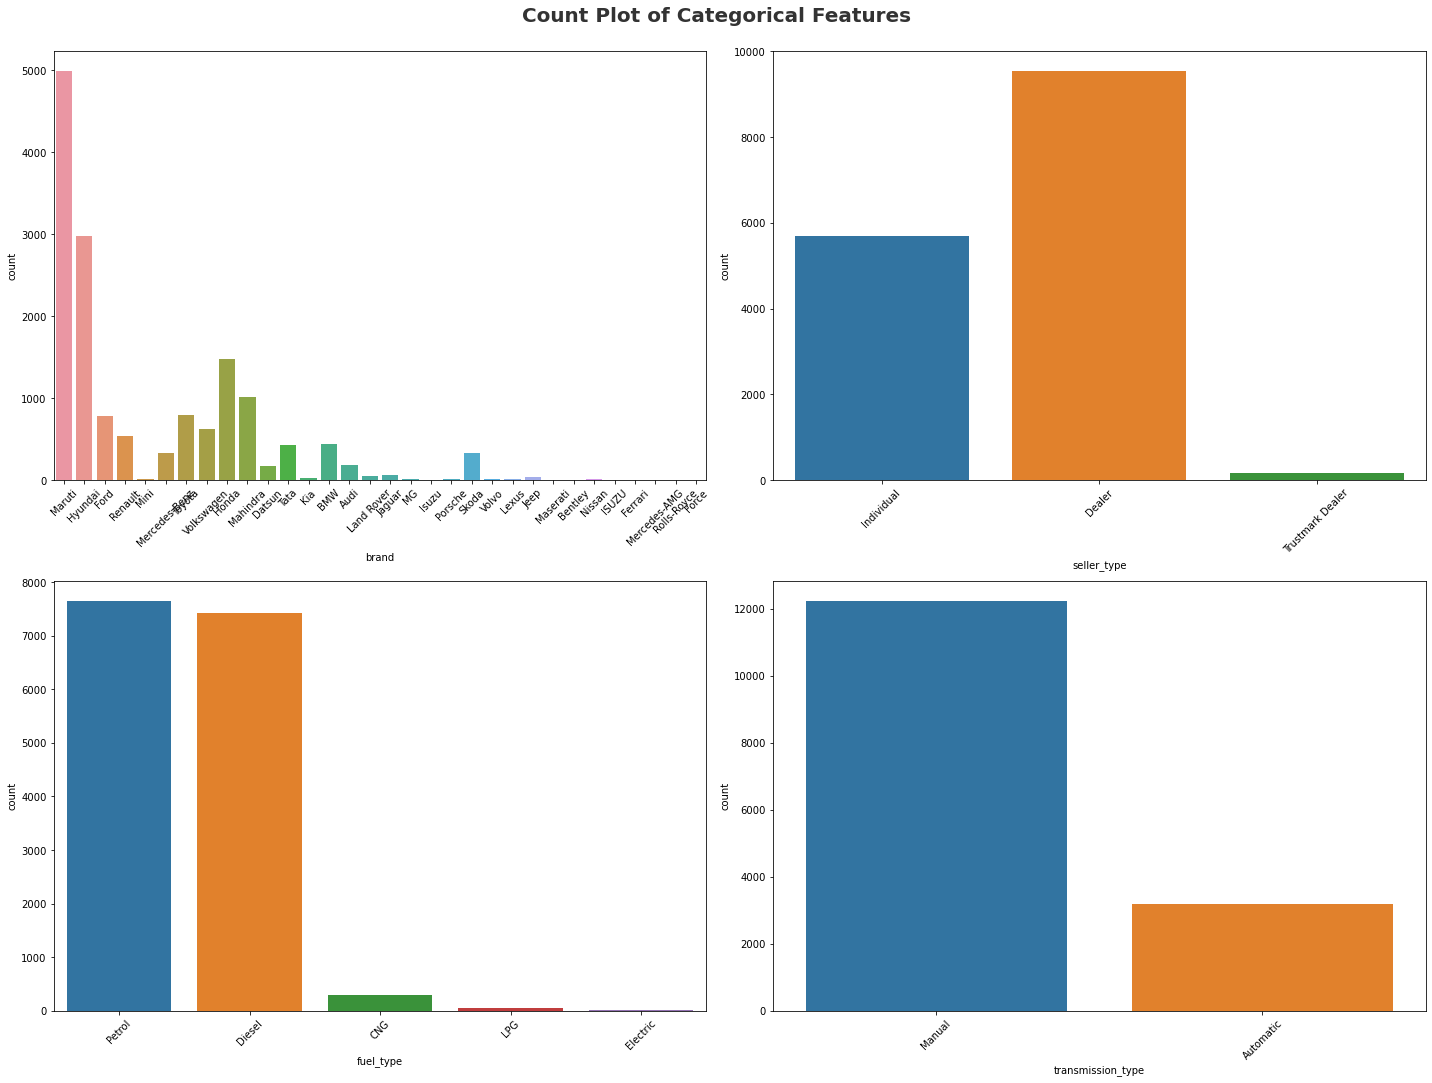

In [162]:
# count plot fo categorical collumns
plt.figure(figsize=(20, 15))
plt.suptitle('Count Plot of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

cat1 = [ 'brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

**Inference**

    The highest observations in the categorical columns are 
    car_name - Hyundai_120, brand - Maruti, model - i20, 
    seller_type - Dealer, fuel_type - Petrol, transmission_type - Manual

## Bivariate Analysis

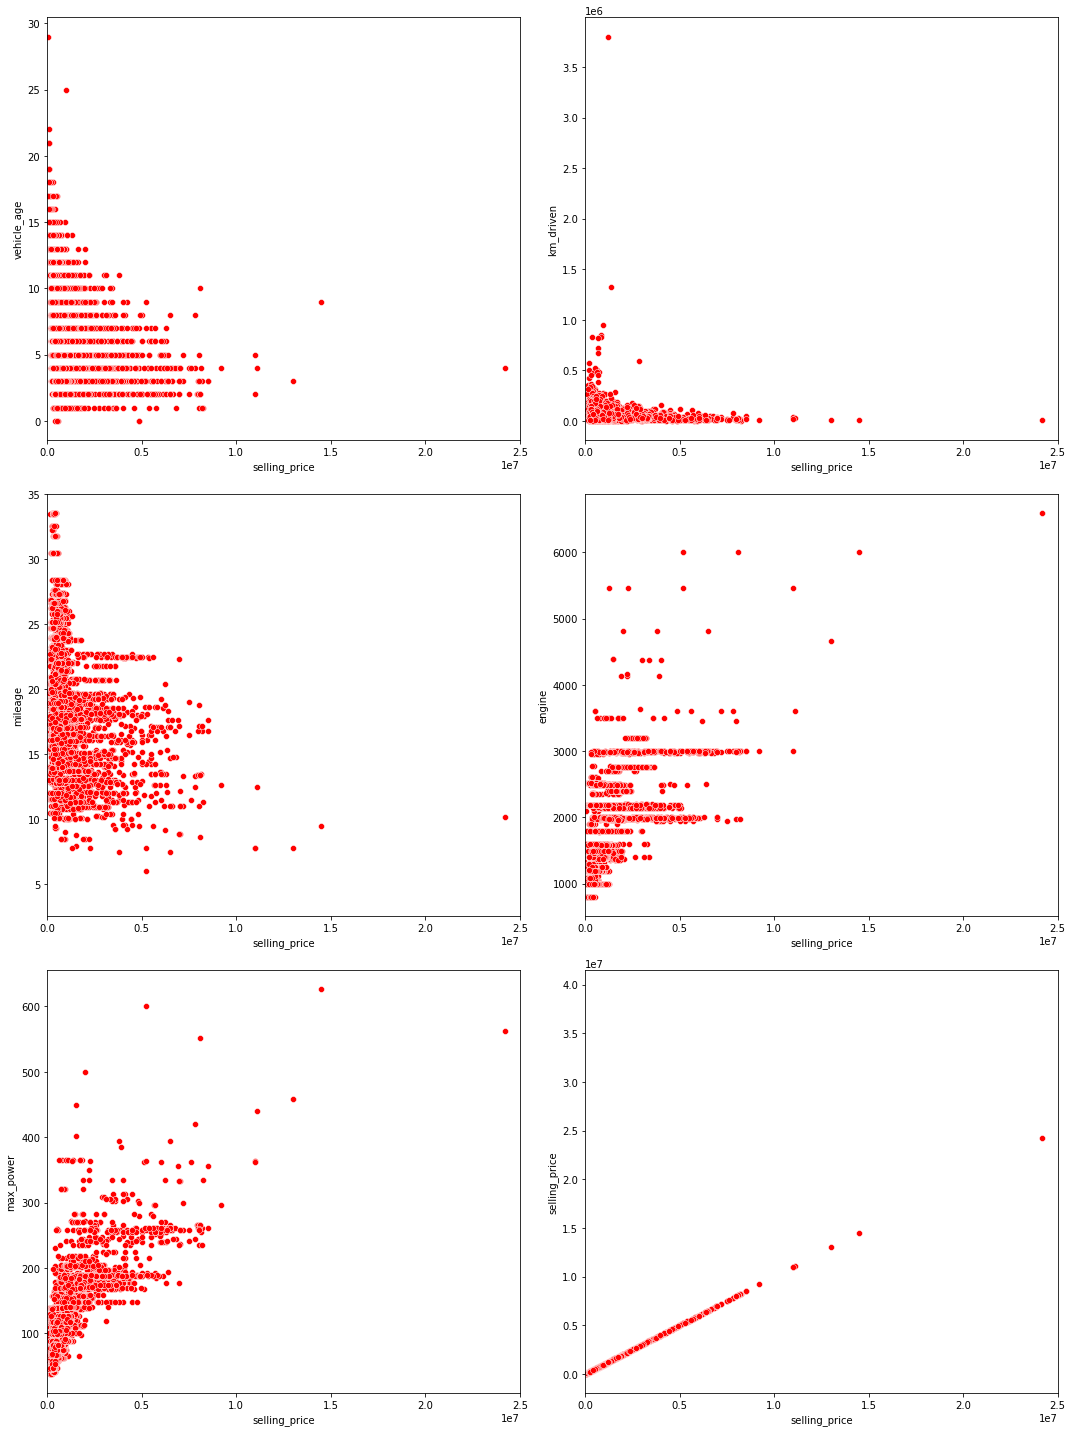

In [163]:
# pair plots of all the continoues numerical features with respect to selling_price
continous_numerical = ['vehicle_age','km_driven','mileage','engine','max_power','selling_price']

plt.figure(figsize = (15,20))

for i in range(0,len(continous_numerical)):
    plt.subplot(3,2,i+1)
    sns.scatterplot(data = df, x = "selling_price", y = df[continous_numerical[i]], color = 'r')
    plt.xlim(0,25000000)
    plt.tight_layout()

**Inference**

    Vehicle with less age is higher in price when compared to older vehicles
    Km_driven has a negative effect on the selling_price
    engine and max power are positively effecting the selling_price

## Multivariate Analysis

<AxesSubplot:>

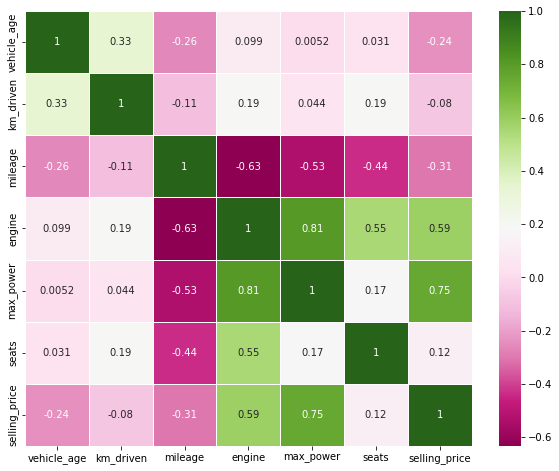

In [164]:
# check correlation between the numerical features

plt.figure(figsize = (10,8))
sns.heatmap(data = df[numerical_features].corr(), annot = True, cmap = 'PiYG',
            linecolor='white', linewidths=1)

## Check multicollinearity for Categorical Features

* The chi-squared test is a statistical test used to analyze categorical data and determine if there is a significant difference between observed and expected frequencies.
* It is used to assess the independence or association between categorical variables.
* Interpretation: It helps us determine if the observed data significantly deviates from the expected data based on the null hypothesis.

* **Null hypothesis (H0): There is no association between the variables (varibles are indeoendent).**
* **Alternative hypothesis (H1): There is an association between the variables (varibles are dependent).**


If the p-value is less than or equal to the significance level (p ≤ alpha), we reject the null hypothesis. This suggests that there is evidence of a statistically significant association between the categorical variables

If the p-value is greater than the significance level (p > alpha), we fail to reject the null hypothesis. This indicates that there is insufficient evidence to conclude a significant association between the variables.

In [165]:
# performing chi square test of independence on the categorical columns
cat = df.select_dtypes(include = 'object').columns
alpha = 0.05

for i in cat:
    observed_data = pd.crosstab(df['selling_price'], df[i])
    chi2, p, dof, expected = chi2_contingency(observed_data)
    
    if p > alpha:
        print('\nFail to reject Null Hypothesis for feature {} with p-value: {}'.format(i,p))
        print('There is no enough evidence to reject Null Hypothesis')
       
    else:
        print('\nReject Null Hypothesis for feature {} with p-value: {}'.format(i,p))
        print('There is evidence to reject Null Hypothesis')
            


Reject Null Hypothesis for feature car_name with p-value: 0.0
There is evidence to reject Null Hypothesis

Reject Null Hypothesis for feature brand with p-value: 0.0
There is evidence to reject Null Hypothesis

Reject Null Hypothesis for feature model with p-value: 0.0
There is evidence to reject Null Hypothesis

Reject Null Hypothesis for feature seller_type with p-value: 1.0386476420735728e-139
There is evidence to reject Null Hypothesis

Reject Null Hypothesis for feature fuel_type with p-value: 0.0
There is evidence to reject Null Hypothesis

Reject Null Hypothesis for feature transmission_type with p-value: 0.0
There is evidence to reject Null Hypothesis


**Inference**

    All the features have a significant association with the label

## Finding insights from Visualization

Text(0.5, 0, 'Selling Price in Lakhs')

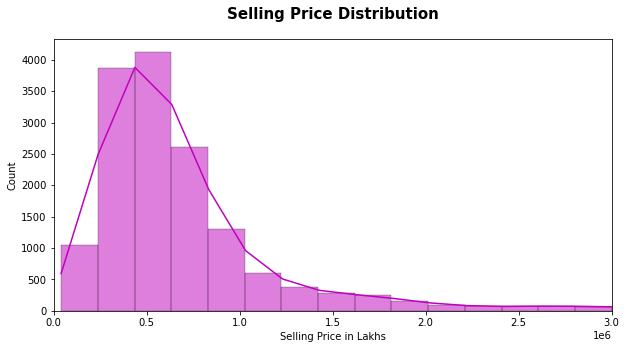

In [166]:
# Check distribution of selling price

plt.figure(figsize = (10,5))
sns.histplot(data = df, x = 'selling_price', bins = 200, kde= True, color = 'm')
plt.xlim(0,3000000)
plt.title("Selling Price Distribution", weight="bold",fontsize=15, pad=20)
plt.xlabel("Selling Price in Lakhs")

**Inference**
    
    We can see that the target variable is right skewed

Text(0.5, 0, 'Mileage')

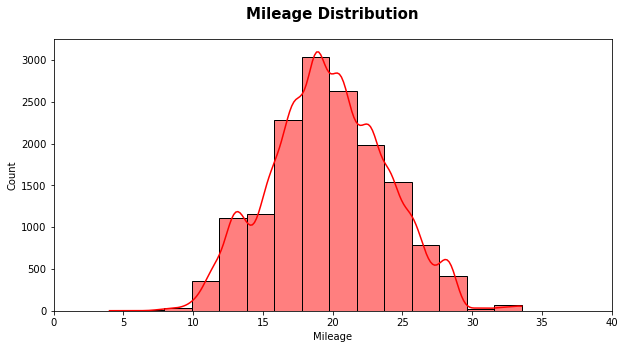

In [167]:
# Check distribution of mileage

plt.figure(figsize = (10,5))
sns.histplot(data = df, x = 'mileage', bins = 15, kde= True, color = 'r')
plt.xlim(0,40)
plt.title("Mileage Distribution", weight="bold",fontsize=15, pad=20)
plt.xlabel("Mileage")

    Mileage is normally distributed

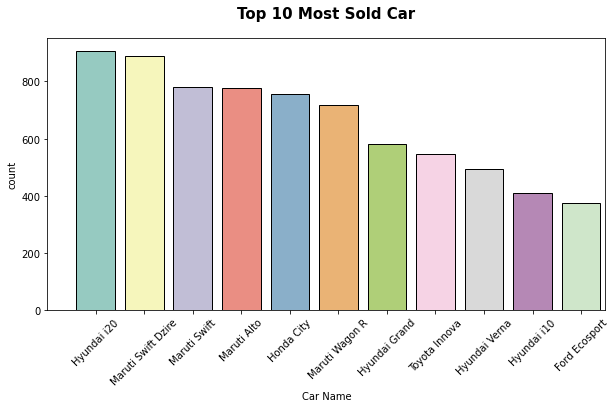

In [168]:
# plot to see the 10 m0st sold cars 

plt.subplots(figsize=(10,5))
sns.countplot(x="car_name", data=df,ec = "black",palette="Set3",order = df['car_name'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=15, pad=20)
plt.xlabel("Car Name")
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [169]:
print("Hyundai i20 is the most sold car which is {} that has an avg selling price of {}"
      .format('5.8 %',df[df['car_name']=='Hyundai i20']['selling_price'].mean()))

Hyundai i20 is the most sold car which is 5.8 % that has an avg selling price of 543603.7527593819


**Inference** 
        
    Top most selling cars in the used cars site are on the chart
    Hyundai i20 is most sold with 5.8% next is Maruti Swift Dzire

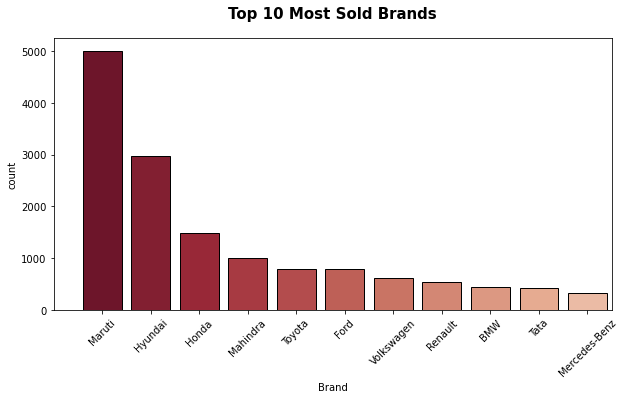

In [170]:
# plot to see the 10 most sold brands 

plt.subplots(figsize=(10,5))
sns.countplot(x="brand", data=df,ec = "black",palette="RdBu",order = df['brand'].value_counts().index)
plt.title("Top 10 Most Sold Brands", weight="bold",fontsize=15, pad=20)
plt.xlabel("Brand")
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [171]:
print("Maruti is the most sold brand which is {} that has an avg selling price of {}"
      .format('32.4 %',df[df['brand']=='Maruti']['selling_price'].mean()))

Maruti is the most sold brand which is 32.4 % that has an avg selling price of 487089.3179086539


**Inference**
        
    Maruti is the most displayed brand on the site, folowed by Hyundai and Honda.
    

In [172]:
# Find the costliest car_name

cars = df.groupby(['car_name']).selling_price.max()
cars_10 = cars.to_frame().sort_values('selling_price', ascending= False)[:10]
cars_10

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


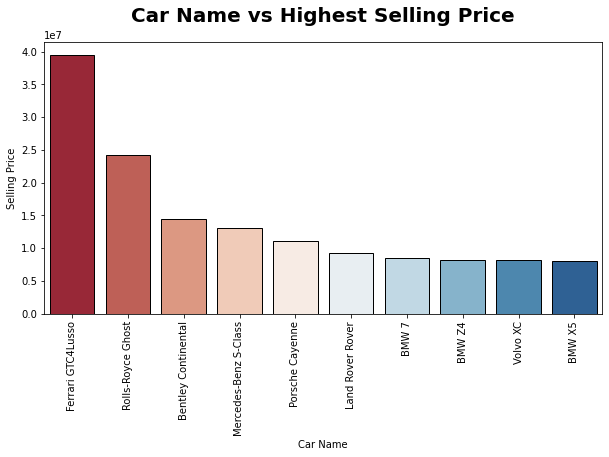

In [173]:
# plot to see the most expensice car_name

plt.subplots(figsize=(10,5))
sns.barplot(x=cars_10.index, y=cars_10.selling_price,ec = "black",palette="RdBu")
plt.title("Car Name vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price")
plt.xlabel("Car Name")
plt.xticks(rotation=90)
plt.show()

**Inference** 

       Most expensive car is Ferrari GTC4Lusso which is 3,95,00,000 followed by Rolls-Royce Ghost which is 2,42,00,000
       rest of the cars are priced below 1,50,00,000

In [174]:
# check car brand with most avg mileage

mileage = df.groupby(['brand']).mileage.mean()
mileage_brand = mileage.to_frame().sort_values('mileage', ascending = False)[:10]
mileage_brand

,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


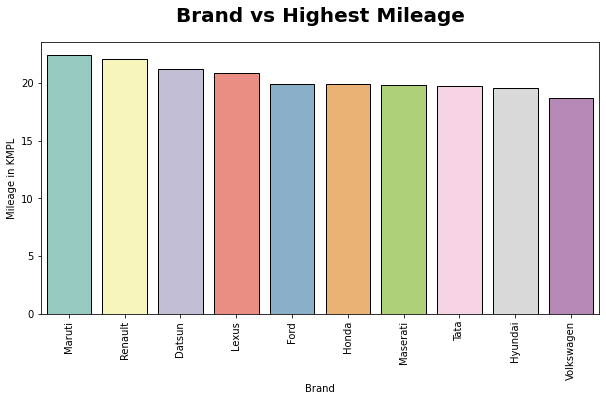

In [175]:
# plot to see the brand with has highest average mileage

plt.subplots(figsize=(10,5))
sns.barplot(x=mileage_brand.index, y=mileage_brand.mileage,ec = "black",palette="Set3")
plt.title("Brand vs Highest Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in KMPL")
plt.xlabel("Brand")
plt.xticks(rotation=90)
plt.show()

In [176]:
# check the car name with most avg mileage

mileage = df.groupby(['car_name']).mileage.mean()
mileage_car = mileage.to_frame().sort_values('mileage', ascending = False)[:10]
mileage_car

,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire LXI,23.260000
Maruti Dzire ZXI,23.260000
Ford Aspire,22.993846


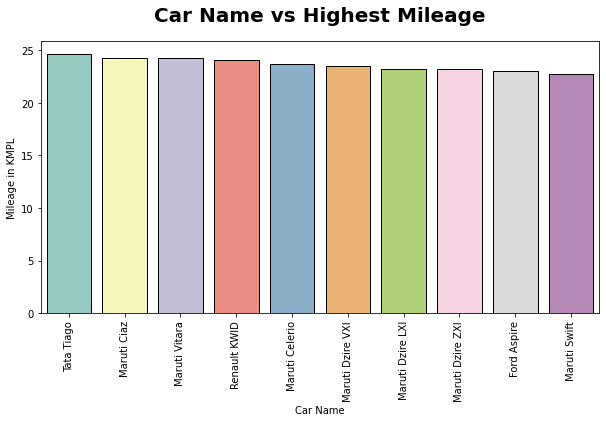

In [177]:
# plot to see the car name with has highest average mileage

plt.subplots(figsize=(10,5))
sns.barplot(x=mileage_car.index, y=mileage_car.mileage,ec = "black",palette="Set3")
plt.title("Car Name vs Highest Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in KMPL")
plt.xlabel("Car Name")
plt.xticks(rotation=90)
plt.show()

**Inference**

    Out of brands Maruthi has the highest avg mileage of 22
    From the car names Tata Tiago has the highest avg mileage of 24
    Followed b y Renault and Maruti Ciaz respectively

In [178]:
# check the fuel_type with highest median selling price

mileage_fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending=False).to_frame()
mileage_fuel

,selling_price
fuel_type,
Electric,1857500.0
Diesel,700000.0
Petrol,460000.0
CNG,370000.0
LPG,182500.0


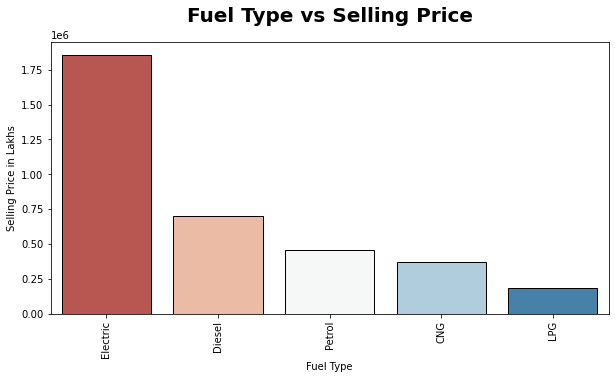

In [179]:
# plot to see the fuel type with highest median selling price

plt.subplots(figsize=(10,5))
sns.barplot(x=mileage_fuel.index, y=mileage_fuel.selling_price,ec = "black",palette="RdBu")
plt.title("Fuel Type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Lakhs")
plt.xlabel("Fuel Type")
plt.xticks(rotation=90)
plt.show()

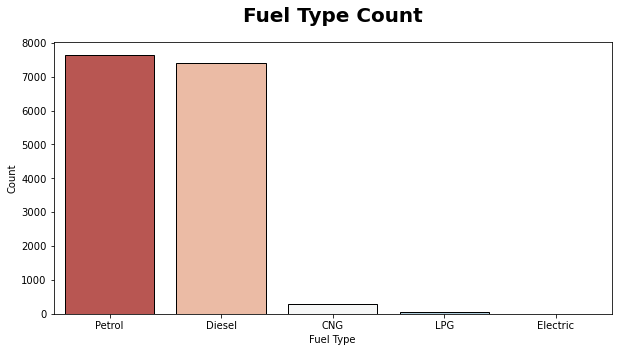

In [180]:
# check most sold fuel type

plt.subplots(figsize=(10,5))
sns.countplot(x=df.fuel_type, ec = "black", palette="RdBu")
plt.title("Fuel Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count")
plt.xlabel("Fuel Type")
plt.show()

**Inference**

    Electric cars the most have higher avereage seling price followe by diesel cars
    On the other side petrol and diesel cars are the most sold cars in used car market
    with electric being the least and petrol being the highest

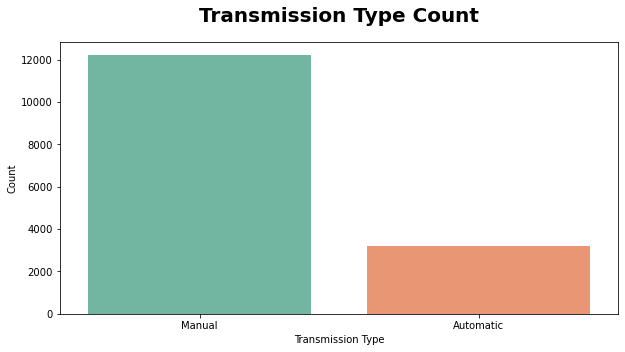

In [181]:
# check the count of transmission_type 

plt.subplots(figsize=(10,5))
sns.countplot(x='transmission_type', data=df,palette="Set2")
plt.title("Transmission Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count",)
plt.xlabel("Transmission Type")
plt.show() 

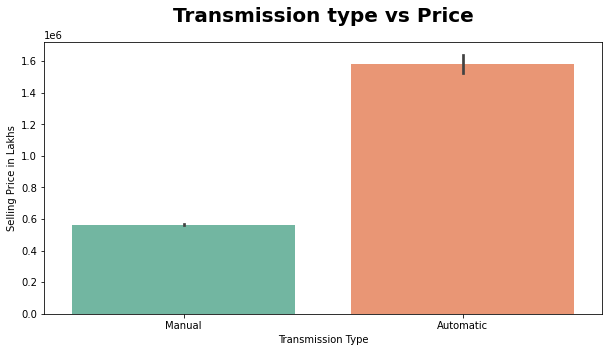

In [182]:
# plot to see the transmission type vs selling price

plt.subplots(figsize=(10,5))
sns.barplot(x='transmission_type', y='selling_price', data=df,palette="Set2")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Lakhs")
plt.xlabel("Transmission Type")
plt.show() 

**Inference**

    Manual cars are most found in used cars
    Anutomatic cars have the higher selling price compared to manual cars

Text(0.5, 1.0, 'Seller Type Count')

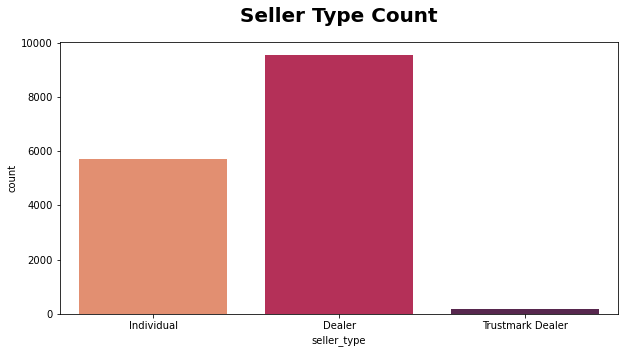

In [183]:
# plot to see the count of seller type

plt.subplots(figsize=(10,5))
sns.countplot(x='seller_type', data=df, palette="rocket_r")
plt.title("Seller Type Count",  weight="bold",fontsize=20, pad =20)

In [184]:
# check the seller type with highest median selling price

seller = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False).to_frame()
seller

,selling_price
seller_type,
Dealer,591000.0
Trustmark Dealer,540000.0
Individual,507000.0


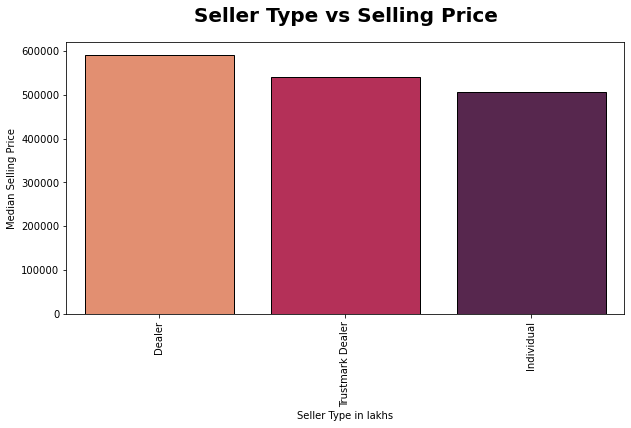

In [185]:
# plot to see the fuel type with highest median selling price

plt.subplots(figsize=(10,5))
sns.barplot(x=seller.index, y=seller.selling_price,ec = "black",palette="rocket_r")
plt.title("Seller Type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Median Selling Price")
plt.xlabel("Seller Type in lakhs")
plt.xticks(rotation=90)
plt.show()

**Inference** 
    
    Dealers use the website more for posting ads and they have more median selling price than individual sellers
    

In [186]:
# check the fuel_type with avg mileage

fuel_mileage = df.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False)
fuel_mileage.to_frame()

,mileage
fuel_type,
CNG,25.814651
Diesel,20.060030
Electric,19.160000
Petrol,19.123045
LPG,17.836364


Text(0, 0.5, 'Mileage in KMPl')

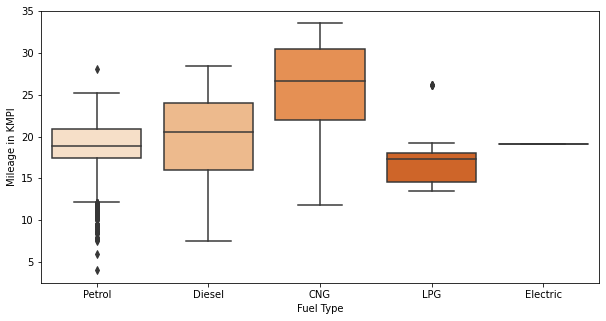

In [187]:
# plot boxplot to see the fuel type vs mileage 

plt.subplots(figsize=(10,5))
sns.boxplot(x='fuel_type',y='mileage', data=df, palette="Oranges")
plt.xlabel("Fuel Type")
plt.ylabel("Mileage in KMPl")

**Inference**

    Petrol has most of the outlies which fall in less mileage category

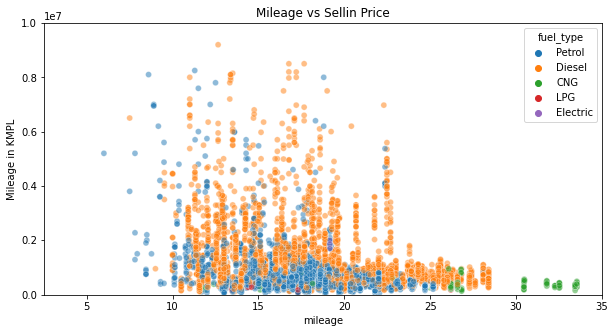

In [188]:
# plot mileage vs selling price

plt.subplots(figsize=(10,5))
sns.scatterplot(x="mileage",y="selling_price",data=df, hue= 'fuel_type',alpha=0.5)
plt.title("Mileage vs Sellin Price")
plt.ylabel("Selling Price in Lakhs")
plt.ylabel("Mileage in KMPL")
plt.ylim(-10000,10000000)
plt.show()

**Inference**

    Mileage of diesel vehicles is the highest followed by petrol vehicles

In [189]:
# check vehicle age and median mileage

vehicle_age = df.groupby('vehicle_age')['mileage'].median().sort_values(ascending=False)
vehicle_age.to_frame().head(5)

,mileage
vehicle_age,
29,22.05
0,21.70
3,21.21
4,20.63
5,20.51


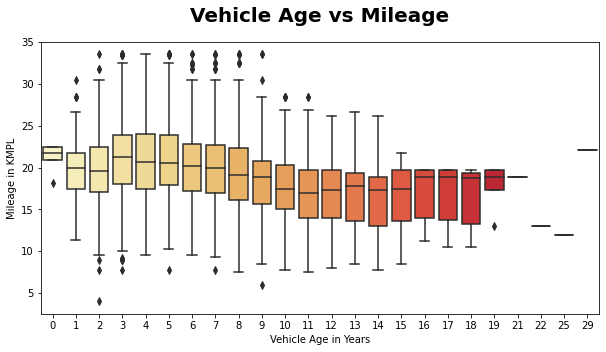

In [190]:
# plot to see the median mileage vs vehicle age

plt.subplots(figsize=(10,5))
sns.boxplot(x=df.vehicle_age, y= df.mileage, palette="YlOrRd")
plt.title("Vehicle Age vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in KMPL")
plt.xlabel("Vehicle Age in Years")
plt.show()

**Inference**

    As the vehicle age increases the median of mileage reduces compared to newer vehicles

In [191]:
# look at the features and remove unnecessary features

df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [192]:
# dropping car_name, brand, model as they are not direcetly related to the target variable selling price

df_new = df.copy()

df_new.drop(['car_name','brand','model'], axis=1, inplace = True)

df_new.head()

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [193]:
# converting the categorical columns into numerical using one hot encoding

df_model = pd.get_dummies(df_new, drop_first = True)
df_model.head()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,1,0,0,0,0,1,1
1,5,20000,18.90,1197,82.00,5,550000,1,0,0,0,0,1,1
2,11,60000,17.00,1197,80.00,5,215000,1,0,0,0,0,1,1
3,9,37000,20.92,998,67.10,5,226000,1,0,0,0,0,1,1
4,6,30000,22.77,1498,98.59,5,570000,0,0,1,0,0,0,1


In [194]:
# check data types
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15411 entries, 0 to 19543
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   vehicle_age                   15411 non-null  int64  
 1   km_driven                     15411 non-null  int64  
 2   mileage                       15411 non-null  float64
 3   engine                        15411 non-null  int64  
 4   max_power                     15411 non-null  float64
 5   seats                         15411 non-null  int64  
 6   selling_price                 15411 non-null  int64  
 7   seller_type_Individual        15411 non-null  uint8  
 8   seller_type_Trustmark Dealer  15411 non-null  uint8  
 9   fuel_type_Diesel              15411 non-null  uint8  
 10  fuel_type_Electric            15411 non-null  uint8  
 11  fuel_type_LPG                 15411 non-null  uint8  
 12  fuel_type_Petrol              15411 non-null  uint8  
 13  t

In [195]:
# now select the label and the features

X = df_model.drop(['selling_price'],axis=1)
y = df_model.selling_price

In [196]:
# split the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

## Fit Stats Model Linear Regresson for checking feature significance

In [209]:
# Stats model 1
st_model1 = sm.OLS(y_train, X_train).fit()
st_model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Ordinary least squares
===============================================================================================
Model:                        OLS                  Adj. R-squared (uncentered):     0.781      
Dependent Variable:           selling_price        AIC:                             361128.6819
Date:                         2023-07-07 11:23     BIC:                             361225.1371
No. Observations:             12328                Log-Likelihood:                  -1.8055e+05
Df Model:                     13                   F-statistic:                     3381.      
Df Residuals:                 12315                Prob (F-statistic):              0.00       
R-squared (uncentered):       0.781                Scale:                           3.0833e+11 
-----------------------------------------------------------------------------------------------
                                Coef.       Std.Err.     t     P>|t|     [0.025       0.975]   
-----------------------------------------------------------------------------------------------
vehicle_age                   -65446.3370   1849.7518 -35.3811 0.0000  -69072.1403  -61820.5338
km_driven                         -1.1808      0.1385  -8.5236 0.0000      -1.4524      -0.9093
mileage                         5033.2999   1201.7894   4.1882 0.0000    2677.6044    7388.9953
engine                            94.2208     27.0034   3.4892 0.0005      41.2899     147.1518
max_power                      14452.0780    249.5684  57.9083 0.0000   13962.8848   14941.2711
seats                         -23432.7985   7618.5116  -3.0758 0.0021  -38366.2746   -8499.3225
seller_type_Individual          2110.0110  10761.9987   0.1961 0.8446  -18985.1921   23205.2141
seller_type_Trustmark Dealer  -89704.4052  47702.7516  -1.8805 0.0601 -183209.2704    3800.4599
fuel_type_Diesel             -215985.8565  34839.3018  -6.1995 0.0000 -284276.3451 -147695.3678
fuel_type_Electric           -239693.8280 323055.7907  -0.7420 0.4581 -872933.7800  393546.1240
fuel_type_LPG                 204574.9539 100360.3684   2.0384 0.0415    7852.9118  401296.9960
fuel_type_Petrol             -266175.3048  31309.8321  -8.5013 0.0000 -327547.4800 -204803.1296
transmission_type_Manual     -120153.8402  15204.2869  -7.9026 0.0000 -149956.6240  -90351.0565
-----------------------------------------------------------------------------------------------
Omnibus:                    25867.669              Durbin-Watson:                 2.001        
Prob(Omnibus):              0.000                  Jarque-Bera (JB):              373160601.376
Skew:                       17.507                 Prob(JB):                      0.000        
Kurtosis:                   854.609                Condition No.:                 4512154      
===============================================================================================
* The condition number is large (5e+06). This might indicate             strong
multicollinearity or other numerical problems.
"""

    T-tests are used in linear regression to determine if a particular variable is statistically significant in the model. A    statistically significant variable is one that has a strong relationship with the dependent variable and contributes significantly to the accuracy of the model. 
   **H0: There is no relationship between Y (response variable) and X (predictor variable)**

   **Ha: There is a relationship between Y and X.**
   
    If the p-value less than 0.05 indicates that the outcome of t-test is statistically significant and you can reject the null hypothesis that there is no relationship between Y and X else we fail to rejest null hypothesis
   
    We can see that the features seller_type_Individual,fuel_type_Electric are insigificant features

#### Check for multicollinearity

In [200]:
num=['vehicle_age','km_driven','mileage','engine','max_power']
def get_vif_factors( X ):
    X_matrix = X.values
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame() 
    vif_factors['column'] = X.columns 
    vif_factors['vif'] = vif
    return vif_factors
vif_factors = get_vif_factors( X_train[num] )
vif_factors

,column,vif
0,vehicle_age,5.376092
1,km_driven,3.516705
2,mileage,5.288781
3,engine,26.254306
4,max_power,19.682303


    We cna observe that the features engine and max power are higly correlared, hence removing engine and checking checking mdel performance

In [214]:
# stats model 2 after removing one high VIF feature
st_model2 = sm.OLS(y_train, X_train.drop(['engine'],axis=1)).fit()
st_model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Ordinary least squares
===============================================================================================
Model:                        OLS                  Adj. R-squared (uncentered):     0.781      
Dependent Variable:           selling_price        AIC:                             361138.8634
Date:                         2023-07-07 11:25     BIC:                             361227.8989
No. Observations:             12328                Log-Likelihood:                  -1.8056e+05
Df Model:                     12                   F-statistic:                     3658.      
Df Residuals:                 12316                Prob (F-statistic):              0.00       
R-squared (uncentered):       0.781                Scale:                           3.0861e+11 
-----------------------------------------------------------------------------------------------
                                Coef.       Std.Err.     t     P>|t|     [0.025       0.975]   
-----------------------------------------------------------------------------------------------
vehicle_age                   -64961.7193   1845.3667 -35.2026 0.0000  -68578.9270  -61344.5115
km_driven                         -1.1433      0.1382  -8.2739 0.0000      -1.4141      -0.8724
mileage                         2940.7383   1041.9287   2.8224 0.0048     898.3949    4983.0817
max_power                      15152.5920    148.3160 102.1643 0.0000   14861.8695   15443.3145
seats                          -4950.7033   5478.2863  -0.9037 0.3662  -15689.0025    5787.5959
seller_type_Individual          2281.1858  10766.7680   0.2119 0.8322  -18823.3659   23385.7374
seller_type_Trustmark Dealer  -86657.3831  47716.3902  -1.8161 0.0694 -180188.9813    6874.2151
fuel_type_Diesel             -200072.6153  34555.1659  -5.7899 0.0000 -267806.1526 -132339.0780
fuel_type_Electric           -172725.0273 322631.4141  -0.5354 0.5924 -805133.1295  459683.0749
fuel_type_LPG                 195502.4292 100372.1843   1.9478 0.0515   -1242.7723  392247.6307
fuel_type_Petrol             -271268.1420  31289.9777  -8.6695 0.0000 -332601.3989 -209934.8851
transmission_type_Manual     -117594.1942  15193.4673  -7.7398 0.0000 -147375.7696  -87812.6187
-----------------------------------------------------------------------------------------------
Omnibus:                    25794.317              Durbin-Watson:                 2.002        
Prob(Omnibus):              0.000                  Jarque-Bera (JB):              363482437.845
Skew:                       17.395                 Prob(JB):                      0.000        
Kurtosis:                   843.484                Condition No.:                 4503458      
===============================================================================================
* The condition number is large (5e+06). This might indicate             strong
multicollinearity or other numerical problems.
"""

#### Check for multicollinearity

In [215]:
num=['vehicle_age','km_driven','mileage','max_power']
def get_vif_factors( X ):
    X_matrix = X.values
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame() 
    vif_factors['column'] = X.columns 
    vif_factors['vif'] = vif
    return vif_factors
vif_factors = get_vif_factors( X_train[num] )
vif_factors

,column,vif
0,vehicle_age,5.235538
1,km_driven,3.243007
2,mileage,5.099983
3,max_power,4.353769


    Multi collinearity has reduced after removing one feature with high vif 
    hence after that we can see a few insigificantg features seats,seller_type_Individual,seller_type_Trustmark Dealer,
    fuel_type_Electric, fuel_type_LPG	

### Fit one final model after removing the feature with high VIF and the insignificant features

In [218]:
# state model 3
st_model3 = sm.OLS(y_train, X_train.drop(['engine','seats','seller_type_Individual','seller_type_Trustmark Dealer',
    'fuel_type_Electric', 'fuel_type_LPG'],axis=1)).fit()
st_model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Ordinary least squares
==========================================================================================
Model:                     OLS                 Adj. R-squared (uncentered):    0.781      
Dependent Variable:        selling_price       AIC:                            361137.0811
Date:                      2023-07-07 11:29    BIC:                            361189.0185
No. Observations:          12328               Log-Likelihood:                 -1.8056e+05
Df Model:                  7                   F-statistic:                    6268.      
Df Residuals:              12321               Prob (F-statistic):             0.00       
R-squared (uncentered):    0.781               Scale:                          3.0869e+11 
------------------------------------------------------------------------------------------
                            Coef.      Std.Err.     t     P>|t|     [0.025       0.975]   
------------------------------------------------------------------------------------------
vehicle_age               -64524.8213  1815.8460 -35.5343 0.0000  -68084.1637  -60965.4788
km_driven                     -1.1534     0.1363  -8.4641 0.0000      -1.4204      -0.8863
mileage                     2954.4504  1013.0041   2.9165 0.0035     968.8038    4940.0970
max_power                  15118.3534   134.7794 112.1711 0.0000   14854.1647   15382.5421
fuel_type_Diesel         -223325.6611 29752.1260  -7.5062 0.0000 -281644.4856 -165006.8366
fuel_type_Petrol         -294259.0234 26707.1589 -11.0180 0.0000 -346609.2356 -241908.8113
transmission_type_Manual -120371.2277 14245.2420  -8.4499 0.0000 -148294.1319  -92448.3235
------------------------------------------------------------------------------------------
Omnibus:                   25814.220            Durbin-Watson:               2.002        
Prob(Omnibus):             0.000                Jarque-Bera (JB):            364832663.914
Skew:                      17.427               Prob(JB):                    0.000        
Kurtosis:                  845.043              Condition No.:               550111       
==========================================================================================
* The condition number is large (6e+05). This might indicate             strong
multicollinearity or other numerical problems.
"""

##### Fit Linear Regression and Regularization Techniques

In [221]:
# define a funtion for evaluation
def evaluate(actual,predicted):
    print("MSE: ",mean_squared_error(actual,predicted))
    print("RMSE: ",np.sqrt(mean_squared_error(actual,predicted)))
    print("MAPE: ",mean_absolute_percentage_error(actual,predicted))

# intantiate Linear Regression
lr = LinearRegression()
# fit linear regression 
lr_model = lr.fit(X_train,y_train)
# make predictions
lr_train_pred = lr_model.predict(X_train)
lr_test_pred = lr_model.predict(X_test)

# evaluate model performance
print("Train Performance - Linear Regression")
evaluate(y_train,lr_train_pred)
print("\nTest Performance - Linear regression")
evaluate(y_test,lr_test_pred)

# intantiate Lasso 
lasso = Lasso()
# fit lasso 
lasso_model = lasso.fit(X_train,y_train)
# make predictions
lasso_train_pred = lasso_model.predict(X_train)
lasso_test_pred = lasso_model.predict(X_test)

# evaluate model performance
print("\nTrain Performance - Lasso")
evaluate(y_train,lasso_train_pred)
print("\nTest Performance - Lasso")
evaluate(y_test,lasso_test_pred)

# intantiate ridge 
ridge = Ridge()
# fit ridge
ridge_model = ridge.fit(X_train,y_train)
# make predictions
ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test)

# evaluate model performance
print("\nTrain Performance - ridge")
evaluate(y_train,ridge_train_pred)
print("\nTest Performance - ridge")
evaluate(y_test,ridge_test_pred)

Train Performance - Linear Regression
MSE:  307094636711.1297
RMSE:  554161.2010156699
MAPE:  0.5142425558462259

Test Performance - Linear regression
MSE:  252099533088.12698
RMSE:  502095.14346200065
MAPE:  0.533022310657347

Train Performance - Lasso
MSE:  307094641561.8955
RMSE:  554161.2053923438
MAPE:  0.5142394759911866

Test Performance - Lasso
MSE:  252099010014.1874
RMSE:  502094.6225704747
MAPE:  0.5330159657525593

Train Performance - ridge
MSE:  307095283662.61005
RMSE:  554161.784736741
MAPE:  0.5142258092065799

Test Performance - ridge
MSE:  252096098616.37323
RMSE:  502091.7233099678
MAPE:  0.5329133114758137


##### Performing SFS forward selection to get the best features for Linear Regression and evaluate Model

In [493]:
# get feature names
feature_names = X.columns

# Create the SequentialFeatureSelector object
sfs = SequentialFeatureSelector(estimator=lr, k_features='best', forward=True, scoring='neg_mean_absolute_percentage_error')

# Perform feature selection
sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = sfs.k_feature_idx_

# Get the selected feature names
selected_feature_names = [feature_names[i] for i in selected_feature_indices]

# Transform the training and testing data to keep only the selected features
X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)

# Print the selected features and the model score
print("Selected Features:", selected_feature_names)

# fit linear regression wit selected features
lr_model = lr.fit(X_train_selected,y_train)
# make predictions
lr_train_pred = lr_model.predict(X_train_selected)
lr_test_pred = lr_model.predict(X_test_selected)

# evaluate model performance
print("Train Performance - Linear Regression - after feature selection")
evaluate(y_train,lr_train_pred)
print("\nTest Performance - Linear regression - after feature selection")
evaluate(y_test,lr_test_pred)

Selected Features: ['km_driven', 'mileage', 'max_power', 'seller_type_Individual', 'fuel_type_Diesel', 'fuel_type_LPG', 'fuel_type_Petrol', 'transmission_type_Manual']
Train Performance - Linear Regression - after feature selection
MSE:  334769617897.2367
RMSE:  578592.7910864744
MAPE:  0.4466234329185394

Test Performance - Linear regression - after feature selection
MSE:  312164320564.1961
RMSE:  558716.6728890379
MAPE:  0.4666643291432916


##### Perform gridsearch for finding the best alpha (learning rate) for the regularization techniques

In [494]:
hyperParameters = {'alpha':np.arange(-1,1,0.01)}
lassoregressor = RandomizedSearchCV(lasso, hyperParameters, scoring='neg_mean_squared_error', cv=5)

lassoregressor.fit(X_train,y_train)

print("Best value for lambda : ",lassoregressor.best_params_)
print("Best score for cost function: ", lassoregressor.best_score_)

train_pred = lassoregressor.predict(X_train)
test_pred = lassoregressor.predict(X_test)

# evaluate model performance
print("\nTrain Performance - Lasso - Alpha tuned")
evaluate(y_train,train_pred)
print("\nTest Performance - Lasso - Alpha tuned")
evaluate(y_test,test_pred)

Best value for lambda :  {'alpha': -0.8899999999999999}
Best score for cost function:  -313563199184.76746

Train Performance - Lasso - Alpha tuned
MSE:  307094640553.3782
RMSE:  554161.2044823944
MAPE:  0.5142453313113519

Test Performance - Lasso - Alpha tuned
MSE:  252100009211.48135
RMSE:  502095.6175983628
MAPE:  0.5330279575086527


In [495]:
hyperParameters = {'alpha':np.arange(-1,1,0.01)}
ridge_regressor = RandomizedSearchCV(ridge, hyperParameters, scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X_train,y_train)

print("Best value for lambda : ",ridge_regressor.best_params_)
print("Best score for cost function: ", ridge_regressor.best_score_)

train_pred = ridge_regressor.predict(X_train)
test_pred = ridge_regressor.predict(X_test)

# evaluate model performance
print("\nTrain Performance - Ridge - Alpha tuned")
evaluate(y_train,train_pred)
print("\nTest Performance - Ridge - Alpha tuned")
evaluate(y_test,test_pred)

Best value for lambda :  {'alpha': 0.8700000000000017}
Best score for cost function:  -313563232131.3554

Train Performance - Ridge - Alpha tuned
MSE:  307095145801.0346
RMSE:  554161.6603492474
MAPE:  0.5142266832171856

Test Performance - Ridge - Alpha tuned
MSE:  252096367799.15292
RMSE:  502091.99137125554
MAPE:  0.5329265411721422


###### Fit Decision Tree Model

In [498]:
dt = DecisionTreeRegressor(criterion = 'mae')

# fit decision tree algorithm

dt_model = dt.fit(X_train,y_train)
# make predictions
dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)

# evaluate model performance
print("Train Performance - DT Regressor")
evaluate(y_train,dt_train_pred)
print("\nTest Performance - DT Regressor")
evaluate(y_test,dt_test_pred)

Train Performance - DT Regressor
MSE:  487580872.80986375
RMSE:  22081.23349837739
MAPE:  0.010261851496849857

Test Performance - DT Regressor
MSE:  109219338555.18164
RMSE:  330483.49210691545
MAPE:  0.17126348792393864


##### Finding the best parameters for Decision Tree

In [504]:
param_grid = {
    'max_depth': range(0,11),  # Range of max_depth values
    'min_samples_split': range(2,21),  # Range of min_samples_split values
    'min_samples_leaf': range(1,11)  # Range of min_samples_leaf values
}

random_search = RandomizedSearchCV(dt, param_distributions=param_grid, n_iter=100, cv=5,verbose=1)

random_search.fit(X_train, y_train)

random_search.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 10}

##### Fit Model with the best parameters

In [505]:
dt = DecisionTreeRegressor(criterion = 'mae',min_samples_split = 4, min_samples_leaf = 2, max_depth = 10)

# fit decision tree algorithm

dt_model = dt.fit(X_train,y_train)
# make predictions
dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)

# evaluate model performance
print("Train Performance - DT Regressor")
evaluate(y_train,dt_train_pred)
print("\nTest Performance - DT Regressor")
evaluate(y_test,dt_test_pred)

Train Performance - DT Regressor
MSE:  47575172087.92992
RMSE:  218117.3355969899
MAPE:  0.12320047413999938

Test Performance - DT Regressor
MSE:  116572023196.76451
RMSE:  341426.45356908784
MAPE:  0.16117382355988277


In [512]:
# creating a dataframe for feature importance weightage and displaying
feature_importance_dt = pd.DataFrame(data=dt.feature_importances_,index=X.columns, columns = ['Importance'])
feature_importance_dt

,Importance
vehicle_age,0.230764
km_driven,0.030796
mileage,0.048575
engine,0.045759
max_power,0.618231
seats,0.011767
seller_type_Individual,0.002684
seller_type_Trustmark Dealer,0.000024
fuel_type_Diesel,0.003065
fuel_type_Electric,0.000000


    Out of all max_power, vehicle_age, mileage, engine and km_driven are the most important features

In [513]:
# fit decision tree model with the high weightage features

columns = ['max_power', 'vehicle_age', 'mileage', 'engine', 'km_driven']

dt = DecisionTreeRegressor(criterion = 'mae')

# fit decision tree algorithm

dt_model = dt.fit(X_train[columns],y_train)
# make predictions
dt_train_pred = dt_model.predict(X_train[columns])
dt_test_pred = dt_model.predict(X_test[columns])

# evaluate model performance
print("Train Performance - DT Regressor")
evaluate(y_train,dt_train_pred)
print("\nTest Performance - DT Regressor")
evaluate(y_test,dt_test_pred)

Train Performance - DT Regressor
MSE:  773362224.2050617
RMSE:  27809.390935528627
MAPE:  0.014051390661374024

Test Performance - DT Regressor
MSE:  333244947296.66724
RMSE:  577273.719561758
MAPE:  0.17874857305495578


##### Finding the best parameters for Decision Tree

In [514]:
param_grid = {
    'max_depth': range(0,11),  # Range of max_depth values
    'min_samples_split': range(2,21),  # Range of min_samples_split values
    'min_samples_leaf': range(1,11)  # Range of min_samples_leaf values
}

random_search = RandomizedSearchCV(dt, param_distributions=param_grid, n_iter=100, cv=5,verbose=1)

random_search.fit(X_train[columns], y_train)

random_search.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'min_samples_split': 11, 'min_samples_leaf': 1, 'max_depth': 8}

##### Fit Model with the best parameters

In [515]:
dt = DecisionTreeRegressor(criterion = 'mae',min_samples_split = 11, min_samples_leaf = 1, max_depth = 8)

# fit decision tree algorithm

dt_model = dt.fit(X_train,y_train)
# make predictions
dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)

# evaluate model performance
print("Train Performance - DT Regressor")
evaluate(y_train,dt_train_pred)
print("\nTest Performance - DT Regressor")
evaluate(y_test,dt_test_pred)

Train Performance - DT Regressor
MSE:  63168065541.855934
RMSE:  251332.57954721258
MAPE:  0.1464191096873799

Test Performance - DT Regressor
MSE:  119814694782.88193
RMSE:  346142.59313595307
MAPE:  0.1731292113633107


In [222]:
# feature scalinf gor fitting the data in KNN regressor
sc = StandardScaler()
X_trainT = sc.fit_transform(X_train)
X_testT = sc.transform(X_test)

In [524]:
knn = KNeighborsRegressor(n_neighbors = 5)

# fit decision tree algorithm

knn_model = knn.fit(X_train,y_train)
# make predictions
knn_train_pred = knn_model.predict(X_train)
knn_test_pred = knn_model.predict(X_test)

# evaluate model performance
print("Train Performance - KNN Regressor")
evaluate(y_train,knn_train_pred)
print("\nTest Performance - KNN Regressor")
evaluate(y_test,knn_test_pred)

Train Performance - KNN Regressor
MSE:  234138581505.5159
RMSE:  483878.68469846435
MAPE:  0.26569031666130194

Test Performance - KNN Regressor
MSE:  268290726151.67856
RMSE:  517967.8813900323
MAPE:  0.34750524908889624


In [534]:
# perform gridseach to find the best k value

param_grid = {'n_neighbors': range(5,50)}

grid_search = GridSearchCV(knn, param_grid,cv=5)

grid_search.fit(X_trainT, y_train)

grid_search.best_params_

{'n_neighbors': 5}

# Out of all the models applied Decision Tree Regressor after the taking the important features and tuning it gave the best performance on both train and test data